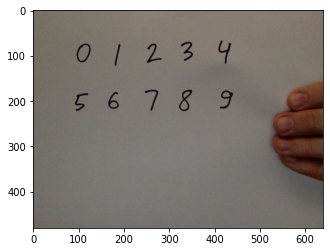

In [2]:
# position a page with 10 hand-written in front of the camera and 
# run this cell to take a webcam snapshot using the opencv library

%matplotlib inline
import cv2
import matplotlib.pyplot as plt

vc = cv2.VideoCapture(0)
plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    if(is_capturing):
        plt.pause(1.0)  # pause for 1 second for camera adjustment
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
    webcam_preview = plt.imshow(frame)    
    vc.release()


In [4]:
# save image
cv2.imwrite('opencv_capture.jpg', frame)
print('saved image..')


saved image..


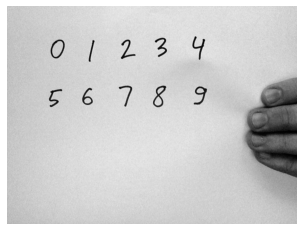

In [24]:
# load image as grayscale
image = cv2.imread('opencv_capture.jpg', cv2.IMREAD_GRAYSCALE)

# show image
plt.imshow(image, cmap='gray'), plt.axis('off')
plt.show()


In [26]:
# import PIL image and interactivecrop libraries
# after running this cell, use the vertical and horizontal slider handle bars to
# select a digit, then press the 'Save Crop Sizes' button below

import os
import numpy as np
from matplotlib.pyplot import imshow
from interactivecrop.interactivecrop import main as crop
from PIL import Image, ImageDraw, ImageFont

img_crop = None

# define the callback to save the image
def crop_callback(image_name, im):
    
    print('im.shape = ', im.shape)
    print('im.size = ', im.size)
    print('im.size[0..3] = ', im.size[0], im.size[1], im.size[2], im.size[3])

    img_edit = im.image.copy()
    
    global img_crop  # make it global
    img_crop = img_edit.crop(
        (im.size[0], im.size[1], im.size[0]+im.size[2], im.size[1]+im.size[3])) 
    
    imshow(np.asarray(img_crop), cmap='gray')
    
crop([image], ['digits'], optimize=True, callback=crop_callback)


GridBox(children=(Dropdown(description='Img Name:', layout=Layout(grid_area='im_selector', width='100%'), opti…

interactive(children=(Button(description='Save Crop Sizes', style=ButtonStyle()), Output()), _dom_classes=('wi…

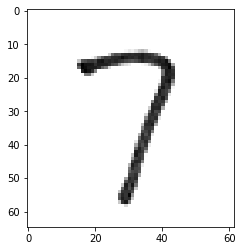

In [34]:
from PIL import Image, ImageEnhance

img_edit = img_crop.copy()

# enhance image brightness
filter = ImageEnhance.Brightness(img_edit)
img_edit = filter.enhance(3.0)

imshow(np.asarray(img_edit), cmap='gray')

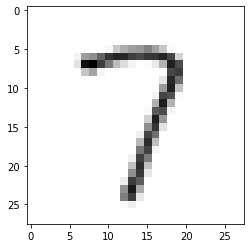

In [35]:
img_edit = img_edit.resize((28, 28))
imshow(np.asarray(img_edit), cmap='gray')


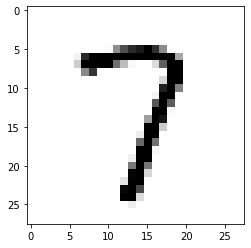

In [36]:
# enhance image contrast
filter = ImageEnhance.Contrast(img_edit)
img_output = filter.enhance(2.5)

imshow(np.asarray(img_output), cmap='gray')


In [37]:
# specify the digit number below and run cell to save the image
DIGIT = 7  
print('saving image.. ', img_edit)
img_output.save('digit_' + str(DIGIT) + '.jpg')

saving image..  <PIL.Image.Image image mode=L size=28x28 at 0x2A08491EA60>


In [38]:
# load the pre-trained MNIST digit CNN model
import keras
from keras import layers
from keras import models

model = models.load_model('mnist-digits-cnn-model.h5')

In [39]:
import numpy as np

img = np.asarray(img_output)
X = img.reshape(1,28,28,1)
y = model.predict(X)

print('prediction:', y)
print('predicted digit:', np.argmax(y))

prediction: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
predicted digit: 7
